ref: https://github.com/marcosan93/Stock-Performance-Predictor-2.0/blob/master/Cleaning-Formatting-Dataset.ipynb

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)

In [2]:
df_stock=pd.read_csv('KLAC_quarterly_financial_data.csv')

In [3]:
def setting_index(df):
    """
    Returns a sorted datetime index
    """
    df['Quarter end'] = pd.to_datetime(df['Quarter end'])
    df.set_index("Quarter end", inplace=True)
    return df.sort_index(ascending=True)

#for i in tqdm(df_stock.keys()):
    #stocks_df[i] = setting_index(df_stock[i])

In [4]:
df_stock=setting_index(df_stock)

In [5]:
def nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
    nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
    nulls.sort_values('porcentaje')
    return nulls

Replacing all "None" values with zero
for i in tqdm(stocks_df.keys()):
    stocks_df[i].replace("None", 0, inplace=True)

In [6]:
df_stock.replace('None', 0, inplace=True)

In [7]:
nulls(df_stock)

,nulls,porcentaje
Shares,0,0.0
Cash at end of period,0,0.0
Capital expenditures,0,0.0
Price,0,0.0
Price high,0,0.0
Price low,0,0.0
ROE,0,0.0
ROA,0,0.0
Cash change during period,0,0.0
Book value of equity per share,0,0.0


Converting all values to numeric values

In [8]:
# Creating a new dictionary that contains the numerical values
#num_df = {}

#for i in tqdm(stocks_df.keys()):
    #num_df[i] = stocks_df[i].apply(pd.to_numeric)
    
num_df=df_stock.apply(pd.to_numeric)

In [9]:
num_df.tail()

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,Price,Price high,Price low,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio
Quarter end,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-31,155872083,155872083,1,5598184000,4540514000,4228041000,1200435000,1370143000,0,0,365374000,2461914000,1021294000,306881000,306881000,1.96,1.95,0.59,352607000,25894000,-202288000,182288000,1255682000,14994000,110.04,123.96,96.12,0.5270,0.1277,8.79,14.05,26.52,33.17,0.5094,1.7968,0.2447,0.1817,0.70,2.17,3.7824
2018-06-30,156126508,156126508,1,5619356000,4549000000,3998845000,1218083000,1620511000,0,0,374031000,2237402000,1070004000,348767000,348767000,2.25,2.22,0.75,373513000,126775000,-341386000,148700000,1404382000,22828000,108.25,118.56,97.94,0.5650,0.1438,10.38,12.32,24.11,33.92,0.4910,1.3807,0.2884,0.1987,0.72,2.25,3.7346
2018-09-30,153075310,153075310,1,5645109000,4521044000,4077740000,1310930000,1567369000,0,0,385557000,2237890000,1093260000,395944000,395944000,2.55,2.54,0.75,381405000,314871000,-449692000,245132000,1649514000,22330000,110.99,122.40,99.58,0.6344,0.1648,10.24,10.69,21.81,34.67,0.4538,1.4278,0.2777,0.2205,0.75,2.35,3.4487
2018-12-31,151363988,151363988,1,5605287000,4485514000,4007665000,1482538000,1597622000,0,0,384298000,1988382000,1119898000,369100000,369100000,2.43,2.42,0.75,282172000,208611000,-347452000,144468000,1793982000,26366000,91.81,102.97,80.65,0.9232,0.2529,10.55,8.97,15.69,35.42,0.3079,1.2446,0.2850,0.3301,0.77,1.69,3.0256
2019-03-31,161620262,161620262,1,9187605000,4442628000,6302017000,1700856000,2849093000,36495000,0,3867215000,3172649000,1097311000,192728000,192728000,1.23,1.23,0.75,163594000,-1734903000,869285000,-701819000,1092163000,25956000,105.19,124.68,85.69,0.6845,0.2006,17.63,9.97,11.52,36.17,0.3572,1.1136,0.3101,0.2983,0.67,0.85,2.6120


### Replacing values with percent difference
(Between each quarter)

Also, mutliplying by 100 for better readability

In [34]:
pcnt_df = {}

for i in tqdm(num_df.keys()):
    pcnt_df[i] = num_df[i].pct_change(periods=1).apply(lambda x: x*100)

In [10]:
pcnt_df = num_df.pct_change(periods=1).apply(lambda x: x*100)

### Replacing infinite values with NaN

for i in tqdm(pcnt_df.keys()):
    pcnt_df[i] = pcnt_df[i].replace([np.inf, -np.inf], np.nan)

In [11]:
pcnt_df= pcnt_df.replace([np.inf, -np.inf], np.nan)

### Creating the Classes
Buy (because the highest high and lowest low of the quarter will both increase by 3% or more)
Sell (because the lowest low and highest high of the quarter will both decrease by 3% or more)
Hold (because it will not do either)

In [12]:
def class_creation(df, thres=3):
    """
    Creates classes of:
    - buy(1)
    - hold(2)
    - sell(0)
    
    Threshold can be changed to fit whatever price change is desired
    """
    if df['Price high'] >= thres and df['Price low'] >= thres:
        # Buys
        return 1
    
    elif df['Price high'] <= -thres and df['Price low'] <= -thres:
        # Sells
        return 0
    
    else:
        # Holds
        return 2

Creating a new DataFrame that contains the class 'Decision' determining if a quarterly reports improvement is a buy, hold, or sell.



new_df = {}

for i in tqdm(pcnt_df.keys()):
    # Assigning the the new DF
    new_df[i] = pcnt_df[i]
    
    # Creating the new column with the classes, shifted by -1 in order to know if the prices will increase/decrease in the next quarter.
    new_df[i]['Decision'] = new_df[i].apply(class_creation, axis=1).shift(-1)

In [13]:
# Creating the new column with the classes, shifted by -1 in order to know if the prices will increase/decrease in the next quarter.
pcnt_df['Decision'] = pcnt_df.apply(class_creation, axis=1).shift(-1)

Excluding the first and last rows
This is done because the last row has no data to compare percent improvements to and the first row does not have any data to show if the price will increase in the future.

In [14]:
pcnt_df=pcnt_df[1:-1]

In [15]:
pcnt_df[['Price high', 'Price low', 'Decision']]

,Price high,Price low,Decision
Quarter end,,,
1994-03-31,53.571429,36.210526,2.0
1994-06-30,0.558140,24.574961,1.0
1994-09-30,19.703978,15.508685,2.0
1994-12-31,2.395672,20.193340,1.0
1995-03-31,22.641509,3.932082,1.0
1995-06-30,21.907692,28.976784,1.0
1995-09-30,18.929833,28.333333,2.0
1995-12-31,-0.764007,-35.688312,0.0
1996-03-31,-24.593670,-33.360258,2.0


In [16]:
nulls(pcnt_df)

,nulls,porcentaje
Shares,0,0.0
Equity to assets ratio,0,0.0
Book value of equity per share,0,0.0
Price low,0,0.0
Price high,0,0.0
Price,0,0.0
Cash at end of period,0,0.0
Current ratio,0,0.0
Decision,0,0.0
Liabilities,0,0.0


In [17]:
pcnt_df.fillna(0, inplace=True)

In [18]:
pcnt_df.columns

Index(['Shares', 'Shares split adjusted', 'Split factor', 'Assets',
       'Current Assets', 'Liabilities', 'Current Liabilities',
       'Shareholders equity', 'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'Decision'],
      dtype='object')

In [19]:
# To plot
import matplotlib.pyplot as plt
import seaborn
pcnt_df['Price'].plot
plt.plot(pcnt_df['Price'], color='r')
plt.plot(pcnt_df['Revenue'], color='b')


C:\Users\FLORENCIA\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [20]:
plt.show()

Resetting the index
Because we no longer need the dates

In [21]:
pcnt_df.reset_index(drop=True, inplace=True)

Dropping the Prices columns
Price
Price high
Price low
To prevent any data leakage because we are looking mainly at the QR's value changes rather than prices

In [22]:
pcnt_df.drop(['Price', 'Price high', 'Price low'], 1, inplace=True)

In [23]:
pcnt_df['Decision'].value_counts()


1.0    43
2.0    33
0.0    24
Name: Decision, dtype: int64

Correlations
Checking for any correlation between the future quarterly report's price and the current quarter's features.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

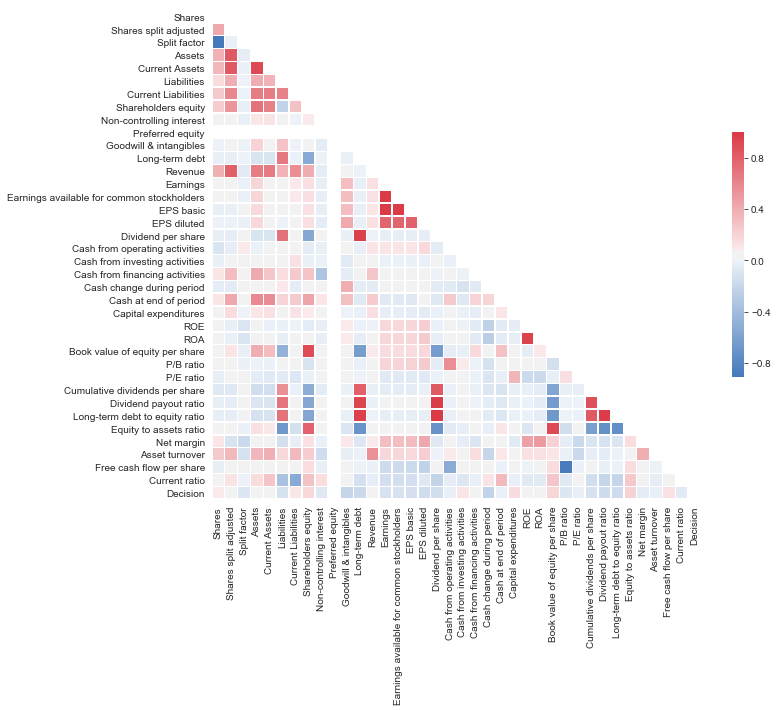

In [25]:
correl=CorrMtx(pcnt_df, dropDuplicates=True)

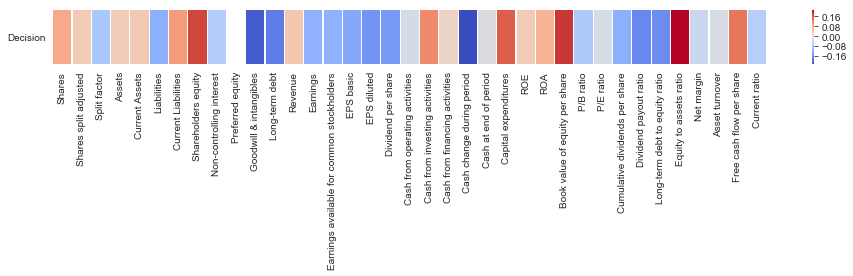

In [26]:
corr=pcnt_df.corr().iloc[[-1],:-1]

# Plotting the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.xticks()
plt.yticks(rotation=0)
plt.savefig("corr_dec.png")
plt.show()

### Feature Importances from the Correlation DF
Determining the top 10 most important features based on their correlation value

In [27]:
top10_corr = corr.transpose().apply(abs).sort_values(by='Decision', ascending=False)[:10]
top10_corr

,Decision
Cash change during period,0.225886
Equity to assets ratio,0.213032
Goodwill & intangibles,0.209942
Book value of equity per share,0.188159
Long-term debt,0.177452
Shareholders equity,0.177035
Dividend payout ratio,0.162478
Capital expenditures,0.158405
Long-term debt to equity ratio,0.157634
EPS diluted,0.149995


### Feature Importances from the DF

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=200)

# Setting the corresponding variables for our classifier
X = pcnt_df.drop(['Decision'], 1)
y = pcnt_df.Decision

# Fitting the classifier
%timeit forest.fit(X, y)

386 ms ± 50.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# Determining the important features
importances = forest.feature_importances_

# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)

# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]

Feature Rankings:
1. Cash change during period: 0.04865029468868405
2. Cash from operating activities: 0.03939053250255002
3. Free cash flow per share: 0.03825681156914232
4. Asset turnover: 0.0355697835198696
5. Current Assets: 0.035440238959862314
6. Goodwill & intangibles: 0.03440693270627229
7. Cash from financing activities: 0.033286961249329505
8. EPS diluted: 0.03324269404901823
9. ROA: 0.032973366801419005
10. Current ratio: 0.03233516078193682


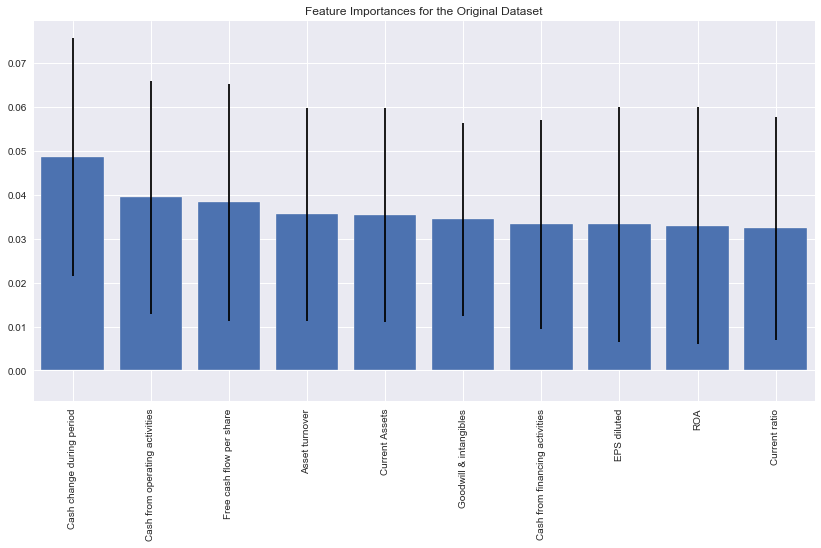

In [30]:
plt.style.use('seaborn')

print("Feature Rankings:")

# Showing the top 10 features
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
# Plotting the top 10 features
plt.figure(figsize=(14,7))

plt.title("Feature Importances for the Original Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-.5, 9.5])
plt.show()

### Selecting the Top 10 most important features
According to the feature importances from the original dataset.

In [31]:
# Assigning the top 10 features as a new DF
top10_df = pcnt_df[X.columns[indices][:10]].join(pcnt_df.Decision)
top10_df.head(5)

,Cash change during period,Cash from operating activities,Free cash flow per share,Asset turnover,Current Assets,Goodwill & intangibles,Cash from financing activities,EPS diluted,ROA,Current ratio,Decision
0,0.000000,0.000000,0.000000,0.0,56.262168,0.0,0.000000,0.0,0.0,34.437980,2.0
1,-62.282618,-463.337947,-342.857143,0.0,9.439665,0.0,-87.790911,0.0,0.0,1.515840,1.0
2,-80.370606,-54.620660,-64.705882,0.0,7.827836,0.0,-110.438948,0.0,0.0,-24.814527,2.0
3,-589.710936,73.878628,100.000000,0.0,0.718397,0.0,-281.963714,0.0,0.0,-14.976663,1.0
4,148.179642,-87.536212,-141.666667,0.0,-3.180792,0.0,8.739003,0.0,0.0,-12.453025,1.0


In [32]:
top10_corr.index
top10_corr_df = pcnt_df[top10_corr.index].join(pcnt_df.Decision)

In [33]:
top10_corr.index

Index(['Cash change during period', 'Equity to assets ratio',
       'Goodwill & intangibles', 'Book value of equity per share',
       'Long-term debt', 'Shareholders equity', 'Dividend payout ratio',
       'Capital expenditures', 'Long-term debt to equity ratio',
       'EPS diluted'],
      dtype='object')

Modeling Pipeline

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [58]:
#del df
#df=top10_corr_df.copy()  #con las 10 variables según la correlacion
df=top10_df.copy() #con las 10 varialbes según el modelo

In [59]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating a Pipeline

In [60]:
# Importing the 10 models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### Creating Pipelines for each model
to scale the data before implementation of each model

In [61]:
# Adaboost
pipe_ada = Pipeline([('scale', StandardScaler()), ('clf', AdaBoostClassifier())])

# Gradient Boost
pipe_gb  = Pipeline([('scale', StandardScaler()), ('clf', GradientBoostingClassifier())])

# Random Forest
pipe_rf  = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

# Decision Tree
pipe_dt  = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Dummy (Baseline)
pipe_dum = Pipeline([('scale', StandardScaler()), ('clf', DummyClassifier())])

# K Nearest Neighbors
pipe_knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

# Logistic Regression
pipe_lr  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

# Naive Bayes
pipe_nb  = Pipeline([('scale', StandardScaler()), ('clf', GaussianNB())])

# Support Vector Machine
pipe_svm = Pipeline([('scale', StandardScaler()), ('clf', SVC())])

# XGBoost
pipe_xgb = Pipeline([('scale', StandardScaler()), ('clf', XGBClassifier())])

#### Creating a List of Model Names and Pipelines¶


In [62]:
pipelines = [pipe_ada, pipe_gb, pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_lr, pipe_nb, pipe_svm, pipe_xgb]

models = ['Adaboost', 
          'GradientBoost', 
          'RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'LogisticRegression',
          'NaiveBayes',
          'SupportVectorMachine',
          'XGBoost']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))

#### Fitting and Training each Pipeline¶

In [63]:
# Looping through each Pipeline to fit and train each model
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      .

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DummyClassifier(constant=None, random_state=None, strategy='stratified'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
...
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


#### Classification Report for each Pipeline¶


In [64]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in model_pipelines.items():
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)


Adaboost (Macro Avg - F1 Score):
0.2447330447330447

GradientBoost (Macro Avg - F1 Score):
0.4222222222222223

RandomForest (Macro Avg - F1 Score):
0.2611111111111111

DecisionTree (Macro Avg - F1 Score):
0.3651960784313726

Dummy(Baseline) (Macro Avg - F1 Score):
0.25925925925925924

KNN (Macro Avg - F1 Score):
0.6373737373737374

LogisticRegression (Macro Avg - F1 Score):
0.41353383458646614

NaiveBayes (Macro Avg - F1 Score):
0.24242424242424243

SupportVectorMachine (Macro Avg - F1 Score):


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.24

XGBoost (Macro Avg - F1 Score):
0.41300964830376596


In [65]:
# Finding the Top 3 Models
for i in sorted(models_f1, key=models_f1.get, reverse=True)[:3]:
    print(i, models_f1[i])

KNN 0.6373737373737374
GradientBoost 0.4222222222222223
LogisticRegression 0.41353383458646614


In [76]:
models_f1

{'Adaboost': 0.2447330447330447,
 'GradientBoost': 0.4222222222222223,
 'RandomForest': 0.2611111111111111,
 'DecisionTree': 0.3651960784313726,
 'Dummy(Baseline)': 0.25925925925925924,
 'KNN': 0.6373737373737374,
 'LogisticRegression': 0.41353383458646614,
 'NaiveBayes': 0.24242424242424243,
 'SupportVectorMachine': 0.24,
 'XGBoost': 0.41300964830376596}

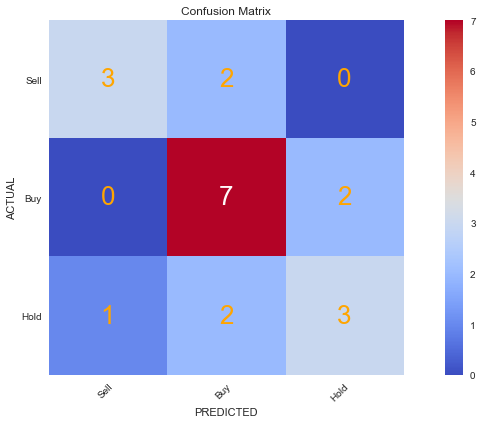

              precision    recall  f1-score   support

        Sell       0.75      0.60      0.67         5
         Buy       0.64      0.78      0.70         9
        Hold       0.60      0.50      0.55         6

   micro avg       0.65      0.65      0.65        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.65      0.65      0.65        20



In [78]:
plot_confusion_matrix(y_test, model_pipelines['KNN'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

# Final Classification Report
print(classification_report(y_test, model_pipelines['KNN'].predict(X_test), target_names=['Sell', 'Buy', 'Hold']))

#### GridSearch¶


In [70]:
from sklearn.model_selection import GridSearchCV
knn_params = {"clf__n_neighbors": [5, 15, 20, 25],
              "clf__weights": ['uniform', 'distance'],
              "clf__p": [1,2]}

In [71]:
# Creating a dictionary for the Top 3 Classifiers with their respective parameters
top3 = {'KNN': [pipe_knn, knn_params]}

In [72]:
# Dictionary storing the best estimators for each classifier
best_estimators = {}

# Grid Searching each classifier
for name, vals in top3.items():
    print(name + ' -'*30)
    
    # Grid Searching 
    gs = GridSearchCV(vals[0], vals[1] , cv=3, return_train_score=True, verbose=2, scoring='f1_macro')
    gs.fit(X_train, y_train)
    
    # Printing out the best parameters for the selected classifier
    print(name+' Best Parameters: ', gs.best_params_)
    
    # Saving the best estimators/tuned models
    best_estimators[name+'_clf'] = gs.best_estimator_

KNN - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   0

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=15, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=uniform .............
[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=uniform .............
[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=15, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=15, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=uniform .............
[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=uniform .............
[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=uniform .............
[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=20, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=20, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.0s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............


C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.2s finished
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNN Best Parameters:  {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'}


In [73]:
## Classification Report for each Tuned Model¶
# Looping through each tuned model's predictions and getting their classification reports
for name, pipe in best_estimators.items():
    print('\nTuned '+ name + ' (Macro Avg - F1 Score):')
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    print(report['macro avg']['f1-score'])


Tuned KNN_clf (Macro Avg - F1 Score):
0.44908424908424904


#### Confusion Matrix for Tuned Model¶


In [74]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

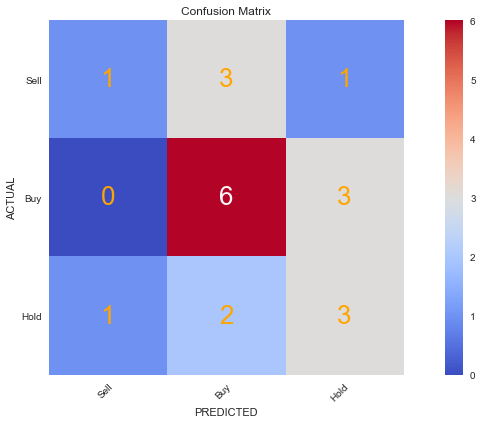

              precision    recall  f1-score   support

        Sell       0.50      0.20      0.29         5
         Buy       0.55      0.67      0.60         9
        Hold       0.43      0.50      0.46         6

   micro avg       0.50      0.50      0.50        20
   macro avg       0.49      0.46      0.45        20
weighted avg       0.50      0.50      0.48        20



In [75]:
plot_confusion_matrix(y_test, best_estimators['KNN_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

# Final Classification Report
print(classification_report(y_test, best_estimators['KNN_clf'].predict(X_test), target_names=['Sell', 'Buy', 'Hold']))